In [174]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

## 1. Making dataset 

In [175]:
x , y = make_regression(n_samples=100,n_features=1,n_informative=1,noise=25,random_state=15)

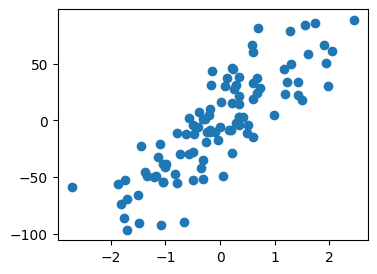

In [176]:
plt.figure(figsize=(4,3))
plt.scatter(x,y)


## 2. Spliting the Data for Test

In [177]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [178]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [179]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[36.40419983]
-0.2764797685671061


In [180]:
y_pred = lr.predict(x_test)

In [181]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7346901530518042

# Implementing Gradient Decent from scratch

In [182]:
class MeraGDR:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.b = None
        self.m = None

    def show_info(self):
        print(f"Slope (m) => {self.m}")
        print(f"Intercept (b) => {self.b}")

    def fit(self, xt, yt, b=0, m=1):
        self.b = b
        self.m = m

        xt = xt.ravel()

        for _ in range(self.epochs):
            slope_b = -2 * np.sum(yt - (self.m * xt) - self.b)
            slope_m = -2 * np.sum((yt - (self.m * xt) - self.b) * xt)

            self.b -= self.lr * slope_b
            self.m -= self.lr * slope_m

        self.show_info()
    
    def predict(self,X):
        return self.m * X + self.b


In [196]:
gd = MeraGDR(0.01,35)


In [197]:
gd.fit(x_train,y_train,m=100,b=-120)

Slope (m) => 36.399147781880025
Intercept (b) => -0.27172046956871754


In [198]:
yp = gd.predict(x_test)
r2_score(y_test,yp)

0.7346607629146286